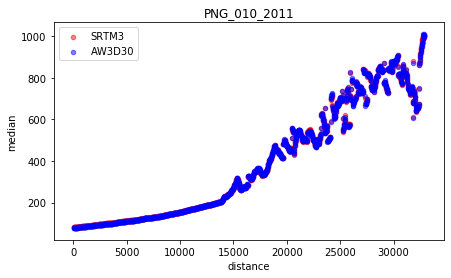

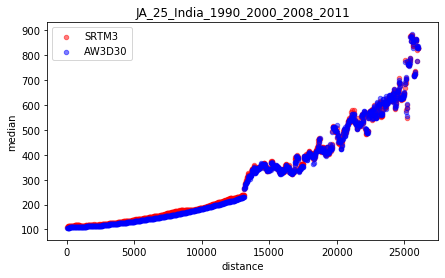

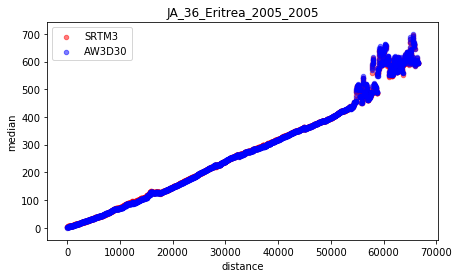

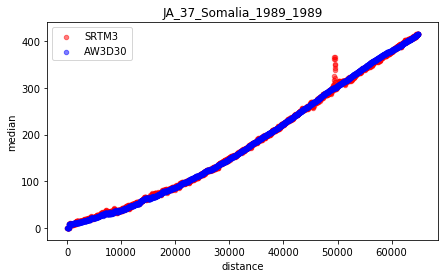

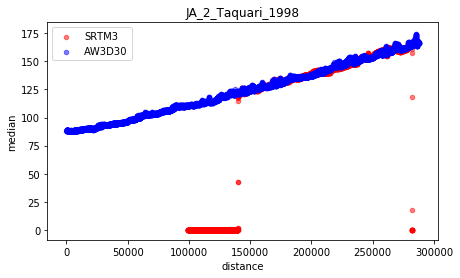

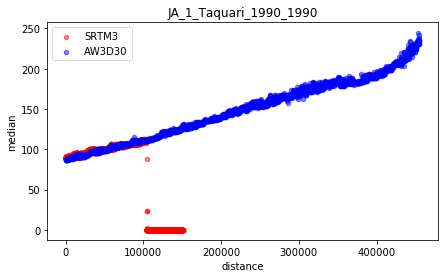

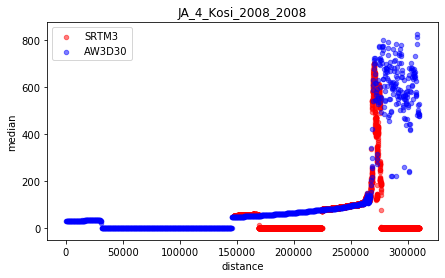

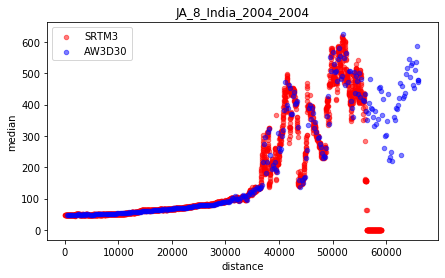

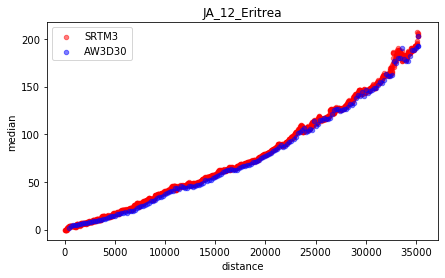

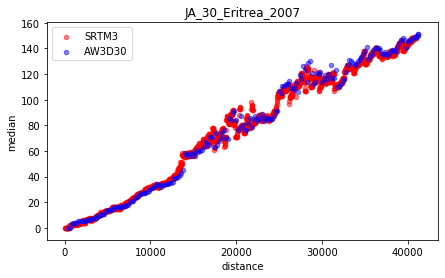

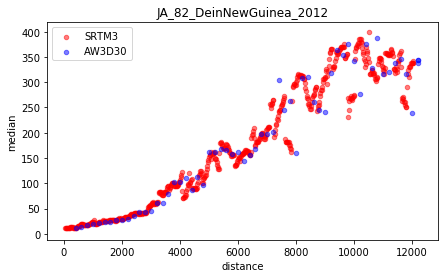

profiles_without_floodplain/JA_81_DeinNewGuinea_2002_2002_profile_SRTM3.csv is missing!


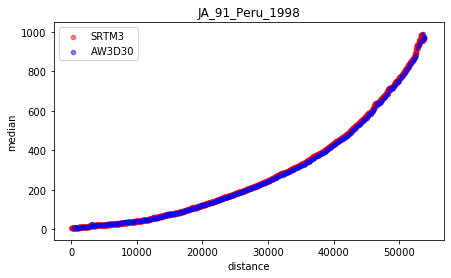

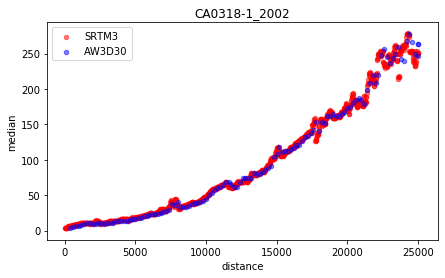

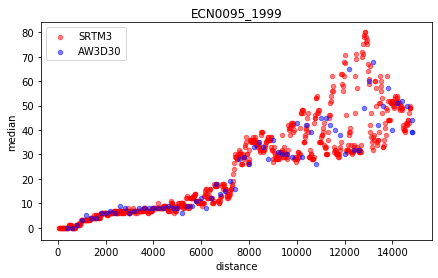

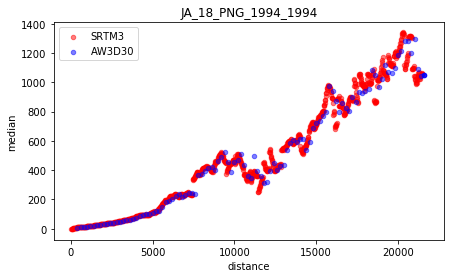

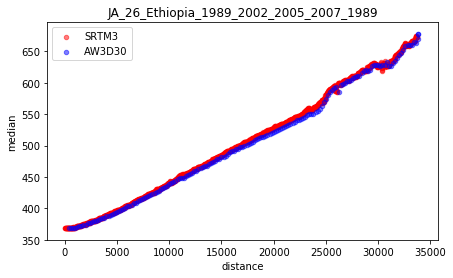

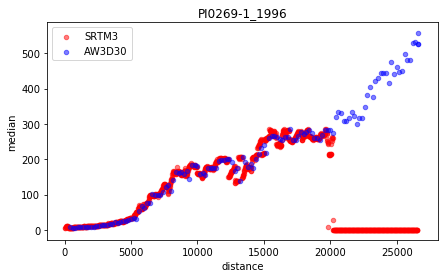

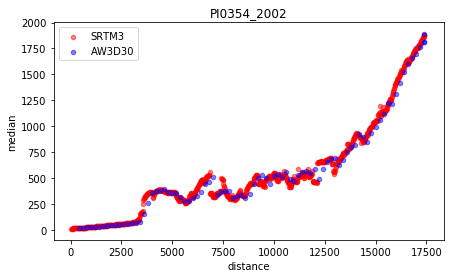

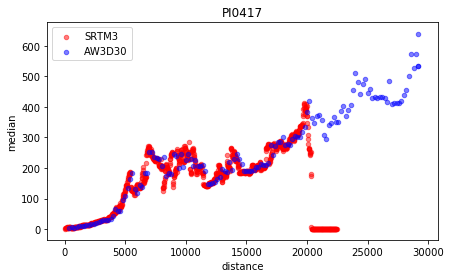

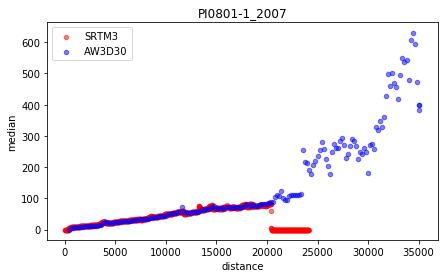

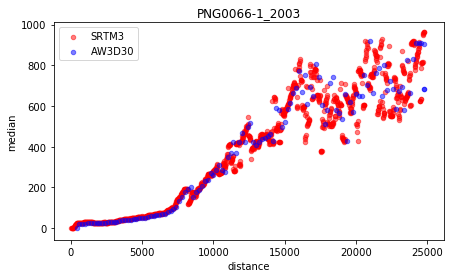

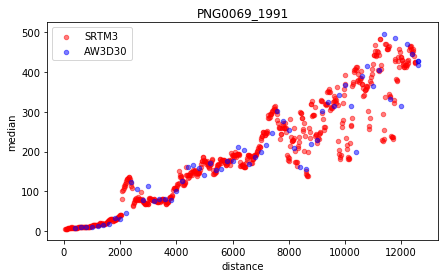

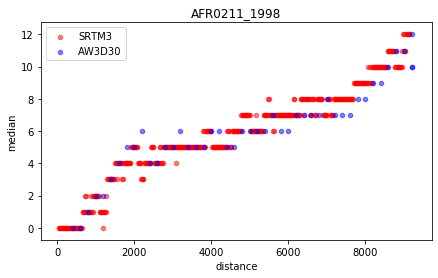

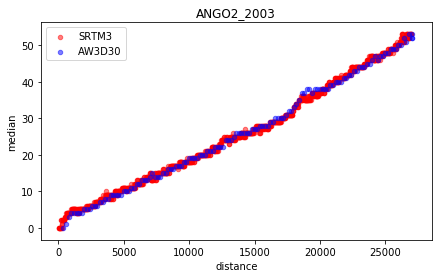

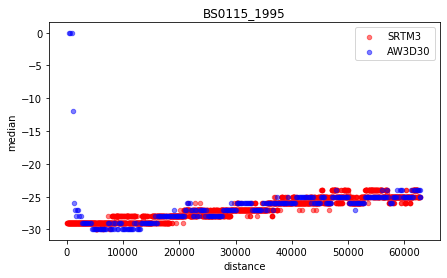

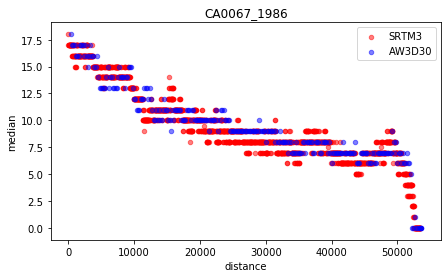

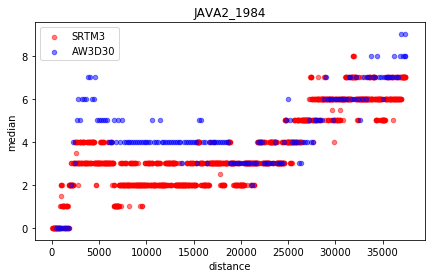

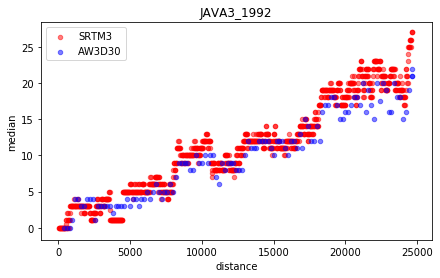

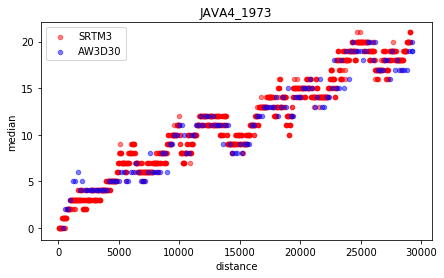

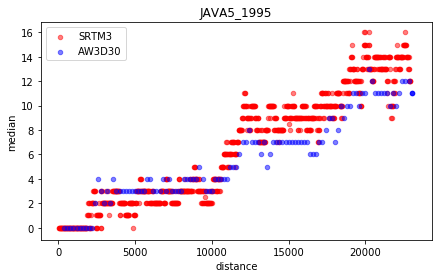

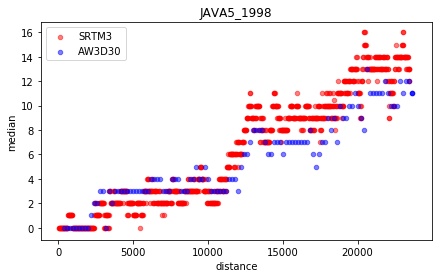

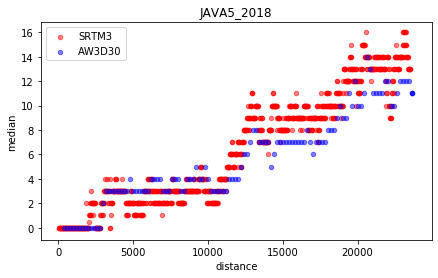

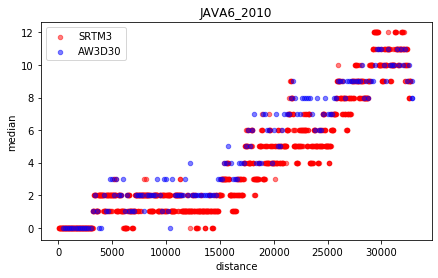

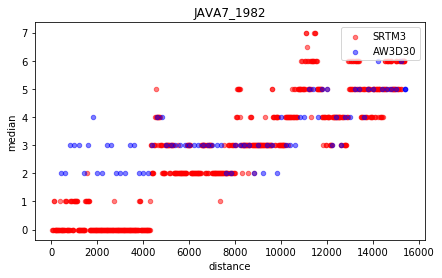

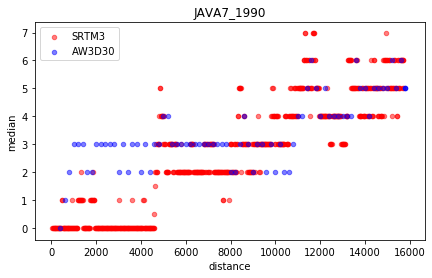

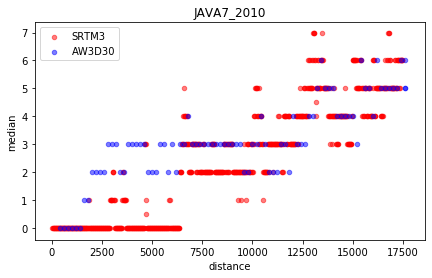

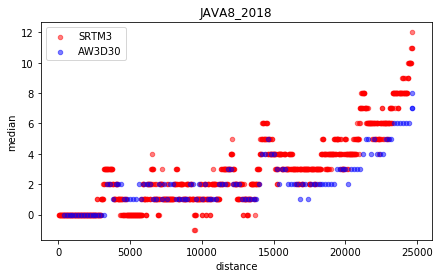

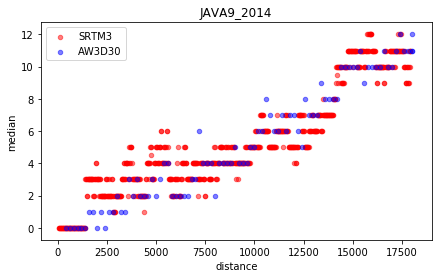

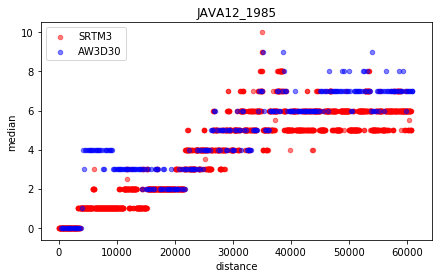

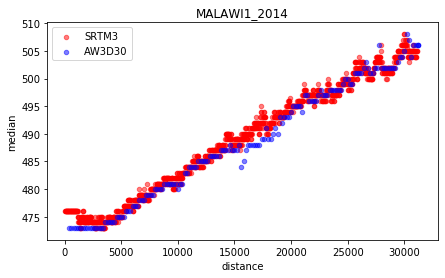

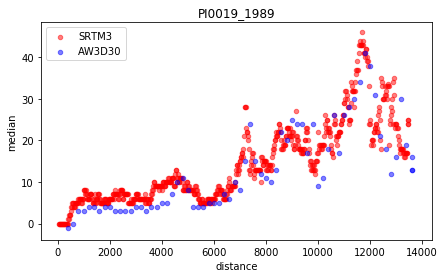

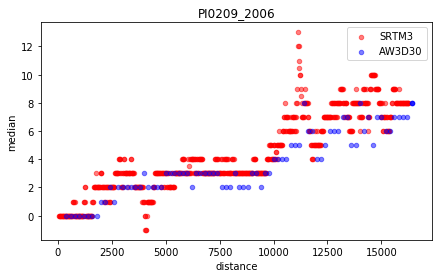

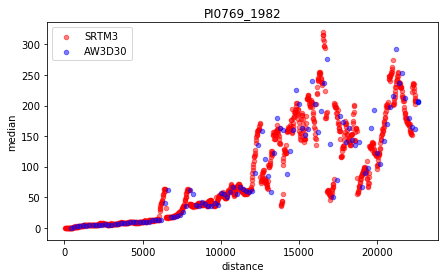

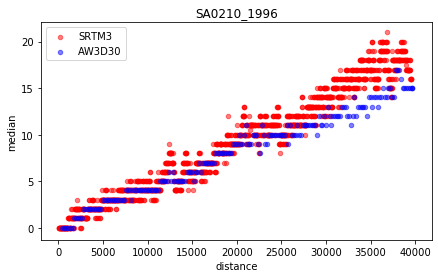

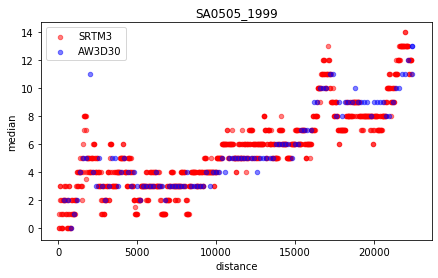

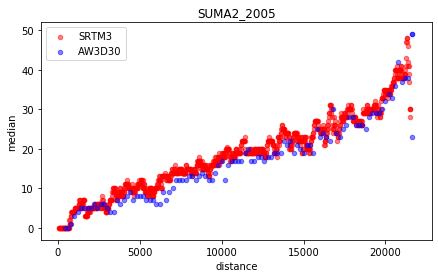

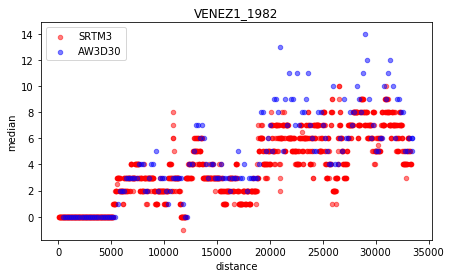

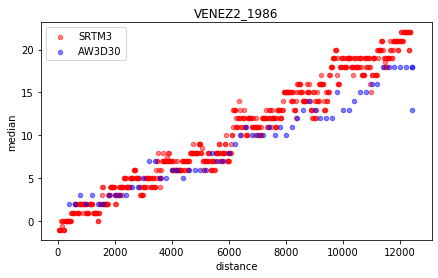

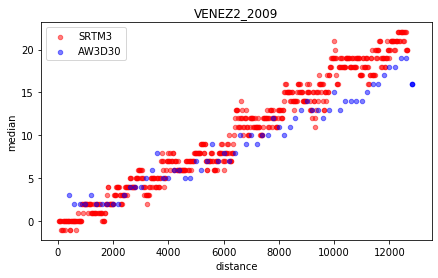

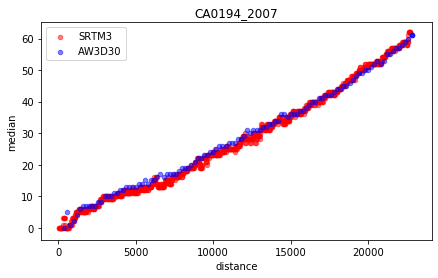

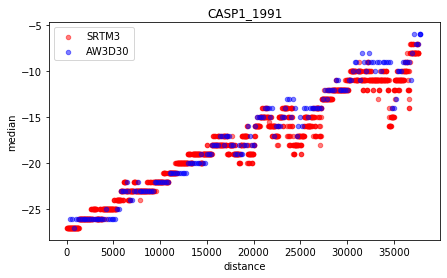

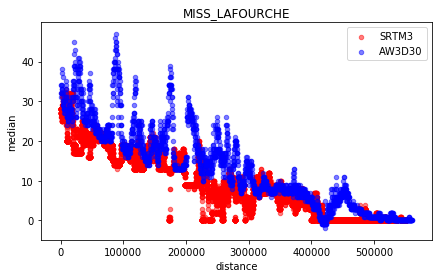

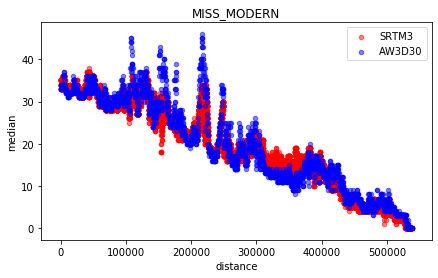

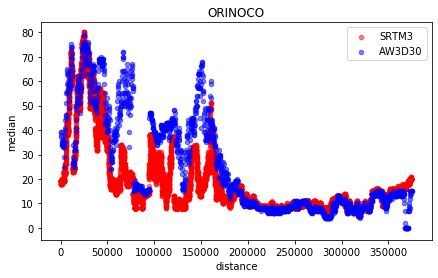

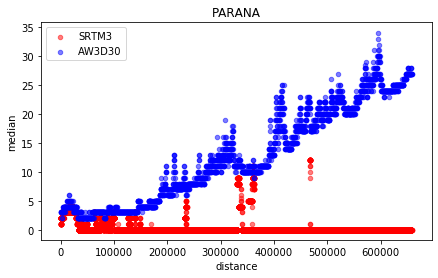

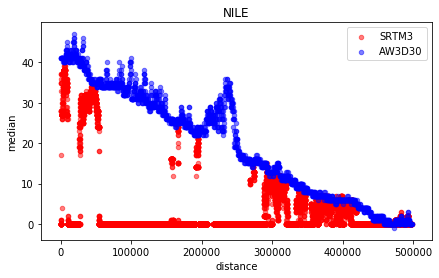

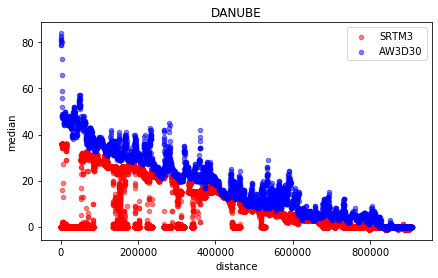

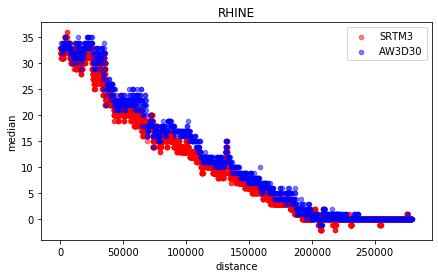

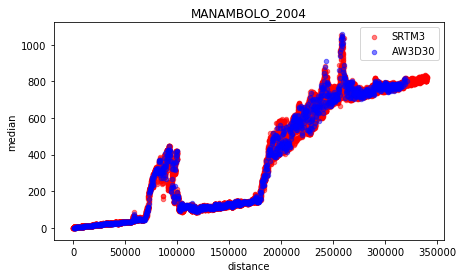

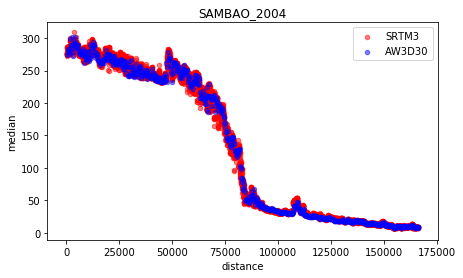

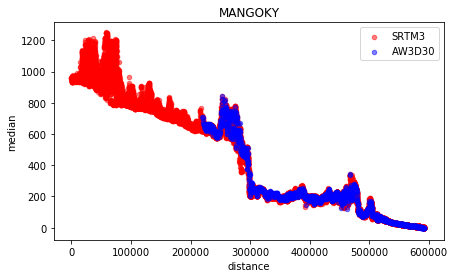

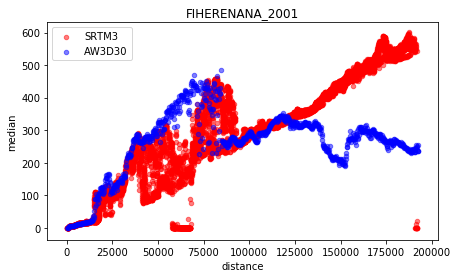

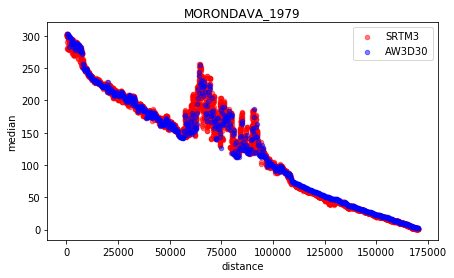

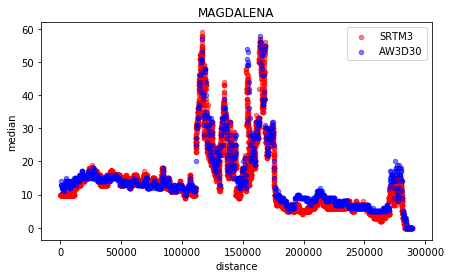

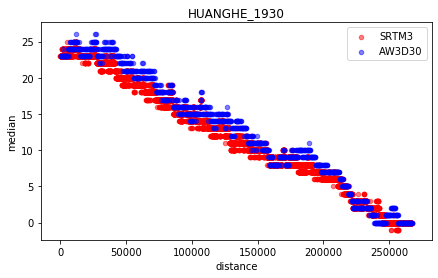

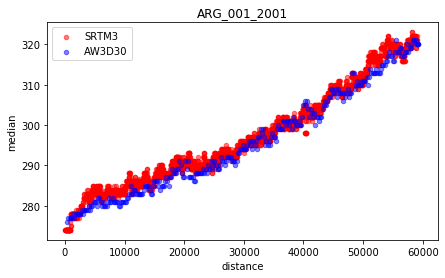

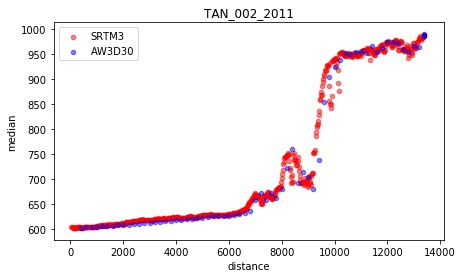

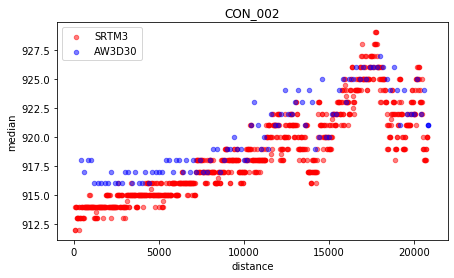

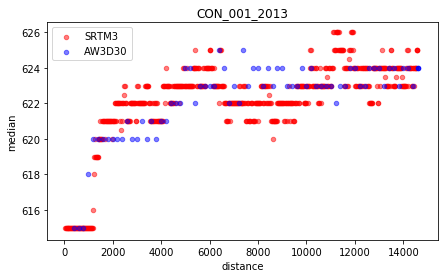

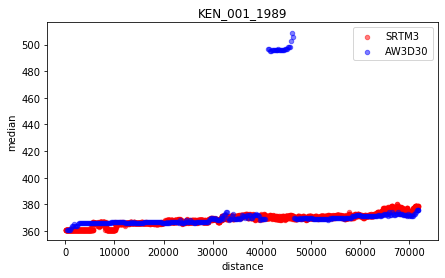

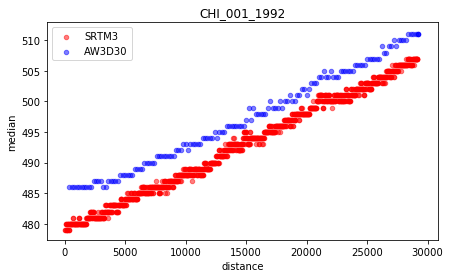

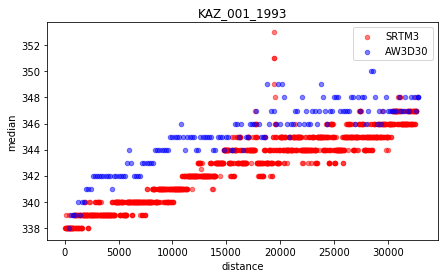

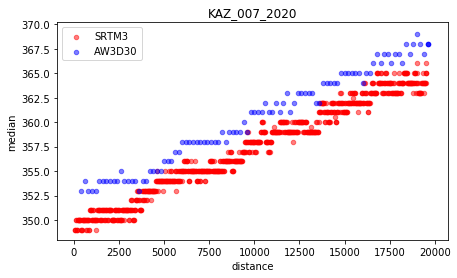

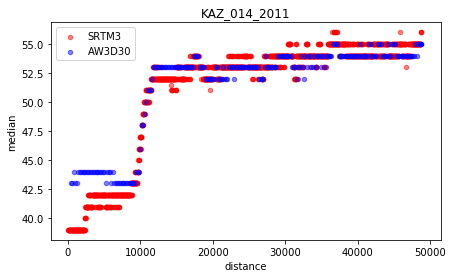

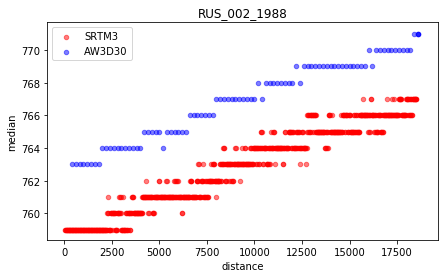

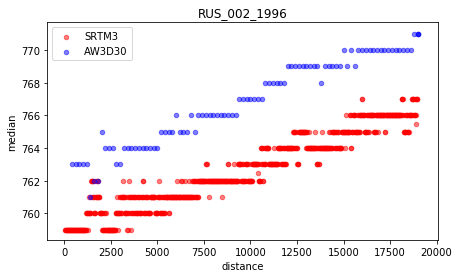

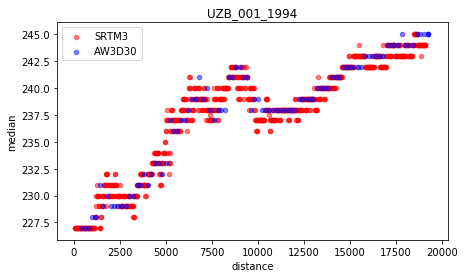

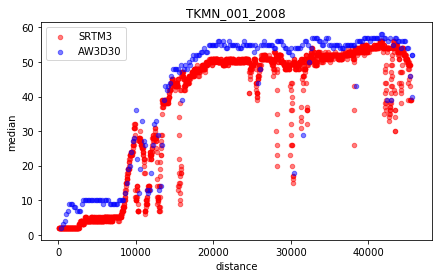

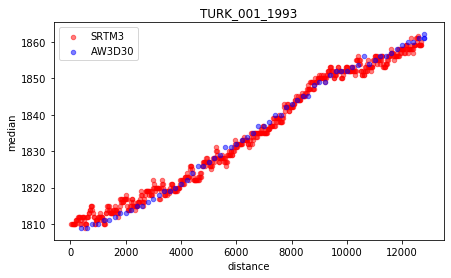

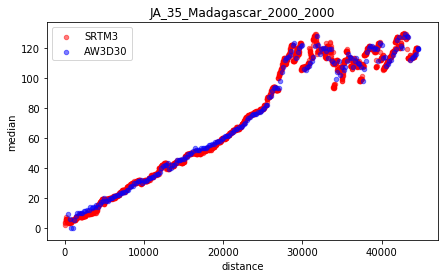

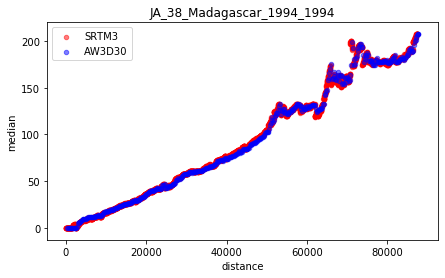

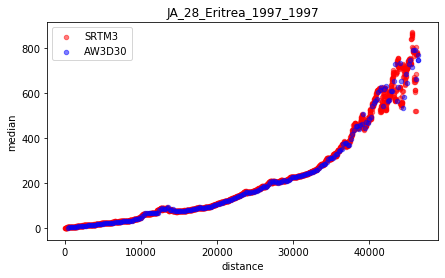

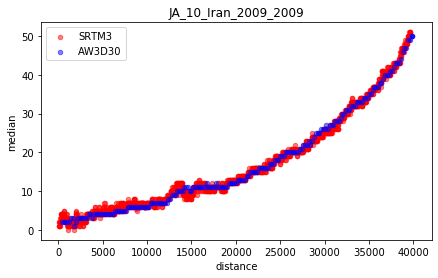

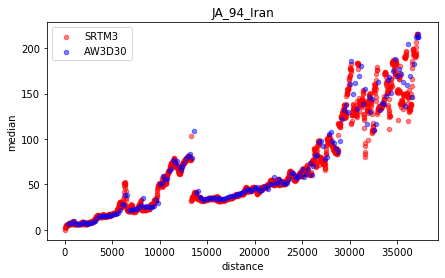

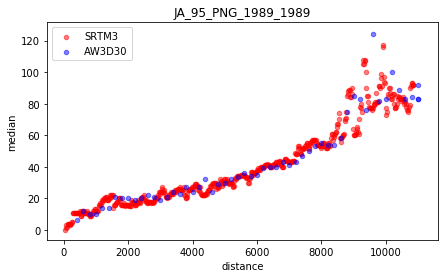

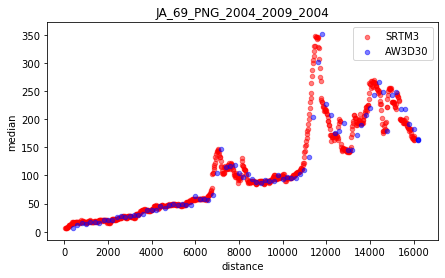

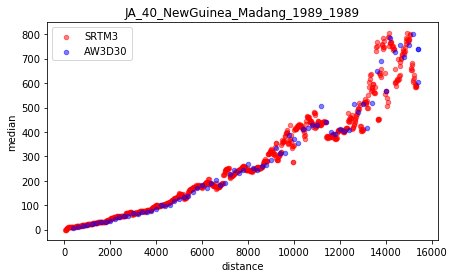

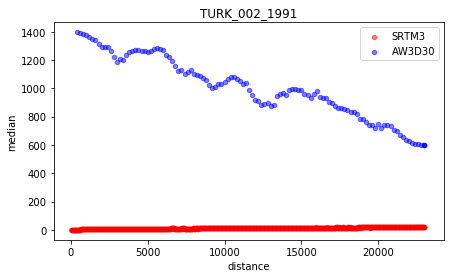

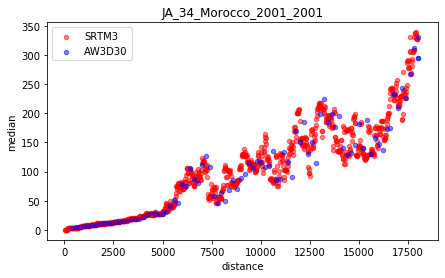

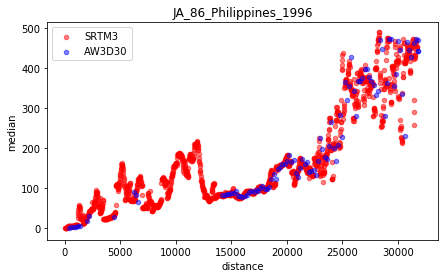

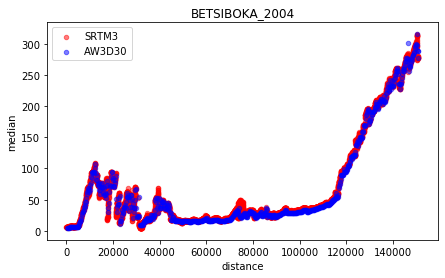

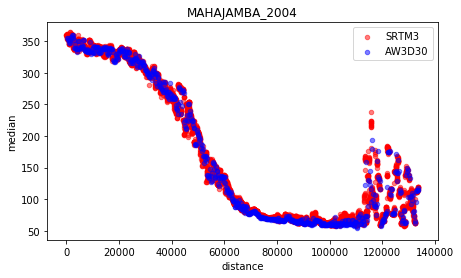

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.interpolate import interp1d
import os
import glob
from subprocess import call
import numpy as np
import fiona

dem_suffix = ['_SRTM3', '_AW3D30']

avulsion_db = './avulsion_locations/Global_Avulsion_DB/Global_Avulsion_DB_v1.shp'

only_missing = []

suffixes = ['_SRTM3', '_AW3D30']

profile_dir = os.path.join('profiles_without_floodplain')

avulsions = []

with fiona.open(avulsion_db) as av_db:

    for f in av_db:

        if len(only_missing) > 0:
            if not f['properties']['Av_ID'] in only_missing:
                continue
            else:
                print(f['properties']['Av_ID'])

        avulsions.append([f['properties']['Av_ID'], f['properties']['year_est'], 0])


for av in avulsions:

    if ((av[1] == None) | (av[1] == 0)):

        srtm_csv = os.path.join(profile_dir, av[0]+'_profile'+suffixes[0]+'.csv')
        aw3d_csv = os.path.join(profile_dir, av[0]+'_profile'+suffixes[1]+'.csv')
        av_id = av[0]
    else:

        srtm_csv = os.path.join(profile_dir, av[0]+'_'+str(av[1])+'_profile'+suffixes[0]+'.csv')
        aw3d_csv = os.path.join(profile_dir, av[0]+'_'+str(av[1])+'_profile'+suffixes[1]+'.csv')
        av_id = av[0]+'_'+str(av[1])

    if not os.path.exists(srtm_csv):
        print(srtm_csv+' is missing!')


    if not os.path.exists(aw3d_csv):
        print(aw3d_csv+' is missing!')


    if os.path.exists(srtm_csv) and os.path.exists(aw3d_csv):

        srtm_df = pd.read_csv(srtm_csv)
        aw3d_df = pd.read_csv(aw3d_csv)

        fig_profile, ax_profile = plt.subplots(figsize=(7,4))

        h1 = srtm_df.plot.scatter('distance', 'median', ax=ax_profile, color='red', alpha=0.5, label='SRTM3')
        h2 = aw3d_df.plot.scatter('distance', 'median', ax=ax_profile, color='blue', alpha=0.5, label='AW3D30')
        
        ax_profile.legend()
        ax_profile.set_title(av_id)

        plt.show()


